## Activation Function

- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 결정하는 역할을 한다.
- 퍼셉트론과 신경망의 주요 차이점은 활성화 함수의 유무이다.

### Step Function

In [ ]:
# Step Function : 입력이 임계값을 넘기면 1 아니면 0

# 실수(부동소수점)만 받아들이는 형태의 계단함수
def step_fn(x):
  if x > 0:
    return 1
  else:
    return 0

# Numpy Array를 받아들이는 형태로 수정
import numpy as np

def step_fn_np(x):
  y = x > 0 # 넘파이 배열에 부등호 연산을 수행하여 bool type 반환
  return y.astype(np.int64) # bool을 int로 변환

In [ ]:
# Run Line by Line
import numpy as np

x = np.array([-1.0, 1.0, 2.])
print(x)
y = x>0
print(y)

y = y.astype(np.int64)
y

[-1.  1.  2.]
[False  True  True]


array([0, 1, 1])

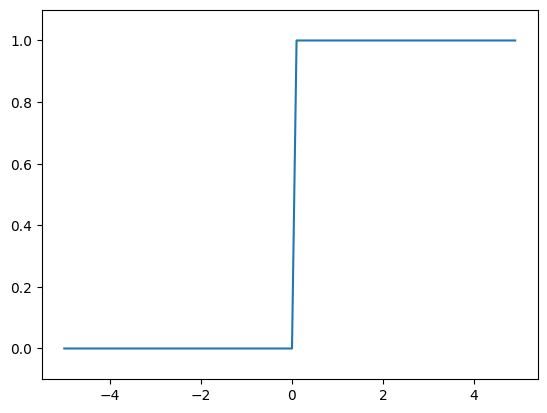

In [ ]:
# Visualize Step Function
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### Sigmoid Function

$h(x) = {1 \over 1+exp(-x)}$

In [ ]:
# Sigmoid Function
import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [ ]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

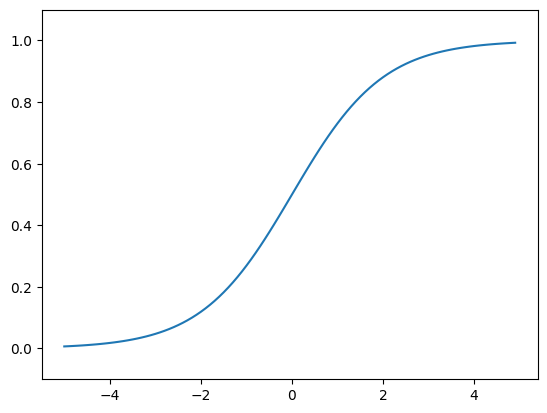

In [ ]:
# Visualize Sigmoid Function
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### Compare Sigmoid Function and Step Function

- 두 함수 모두 입력이 작을 때의 출력은 0에 가깝거나 0, 입력이 클 때의 출력은 1에 가깝거나 1이 되는 구조이다.
- 0 또는 1 중 하나의 값만 리턴하는 스텝 함수와 다르게, 시그모이드 함수는 곡선 형태의 함수로, 그 값이 연속적인 실수의 형태로 흐른다.

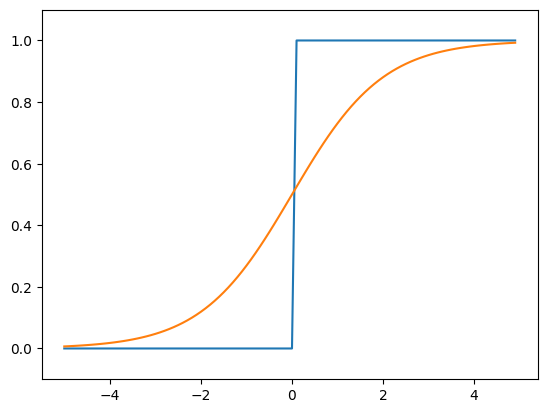

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=np.int64)

def sigmoid(x):
  return 1 / (1+np.exp(-x))


x = np.arange(-5.0, 5.0, 0.1)

# Visualize Step Function and Sigmoid Function
y_step = step_function(x)
y_sigmoid = sigmoid(x)

plt.plot(x,y_step)
plt.plot(x, y_sigmoid)
plt.ylim(-0.1, 1.1)

plt.show()

### Non Linear Function

- 신경망의 활성화 함수로는 비선형 함수를 사용해야 한다. 선형 함수를 사용해 층수를 아무리 늘려도 의미가 없기 때문이다.

- e.g. h(x) = cx인 선형 함수를 활성화 함수로 사용해 3층 네트워크를 만든다면:
  - y(x) = h(h(h(x))) 인 네트워크가 된다.
  - 이를 전개하면 y(x) = c * c * c * x
  - 정리하면 y(x) = ax ($a = c^3$)
  - 이는 은닉층이 없는 네트워크와 같다고 할 수 있으며, 층을 늘리는 의미가 없다고 볼 수 있다.

### ReLU Function(Rectified Linear Unit)

- 0이 넘으면 그대로 출력하고, 0 이하의 값은 모두 0으로 출력하는 함수이다.

$$
h(x) =
\begin{cases}
x & (x > 0) \\
0 & (x \le 0)
\end{cases}
$$




In [ ]:
import numpy as np
def relu(x):
  return np.maximum(0,x)

## Calculate Multidimensional array

### Multidimensional array and Matrix Multiplication

- 행렬의 특성을 이해하면 대부분이 설명되므로 이후 설명을 생략한다.

참고사항

- Numpy의 1차원 연산 시 특징

  - a = [[1,2], [3,4], [5,6]]
  - a' = [[1,3,5], [2,4,6]]
  - b = [7,8]

1. a * b는 3x2 행렬과 2x1 행렬의 곱과 같은 과정으로 이루어진다.
  - 즉, b는 계산에서 [[7],[8]]처럼 취급
2. b * a'는 1x2 행렬과 2*3 행렬의 곱과 같은 과정으로 이루어진다.
  - 즉, b는 계산에서 [[7,8]]처럼 취급

- 여기서, 수학적으로 1.은 3x1행렬아며, 2.는 1x3행렬이다.
- 그러나, NumPy 연산에선, 해당 결과 모두 1차원으로 차원 축소되서 같은 차원을 반환한다.
  - 계산의 값이 동일하게 나온다는 의미 X


### Matrix Multiplication in Neural Network

In [ ]:
import numpy as np

X = np.array([1,2]) # 1D array, (2, )

W = np.array([[1,3,5], [2,4,6]]) # 2D array, (2,3)

Y = np.dot(X,W)
Y

array([ 5, 11, 17])

## Implementation of a 3-layer neural network

In [ ]:
# Forward Propagation from 0 to 1-Layer : A(1) = XW(1) + B(1)

import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[.1, .3, .5], [.2, .4, .6]])
B1 = np.array([.1, .2, .3])

print(W1.shape, X.shape, B1.shape)

A1 = np.dot(X, W1) +B1

(2, 3) (2,) (3,)


In [ ]:
# Apply activation function on 1-Layer
import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))


Z1 =sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# Forward Propagation from 1 to 2-Layer,
# and Apply activation function on 2-Layer

import numpy as np

W2 = np.array([[.1, .4], [.2, .5], [.3, .6]])
B2 = np.array([.1, .2])

print(Z1.shape, W2.shape, B2.shape)

A2 = np.dot(Z1, W2) +B2
Z2 =sigmoid(A2)

(3,) (3, 2) (2,)


In [ ]:
# Forward Propagation from 2-Layer to Output Layer
import numpy as np

# 출력층의 활성함수는 Target Problem에 따라 다르게 정의한다. (e.g. Identity_fn, Sigmoid_fn, Softmax, etc.)
def identity_function(x): # 항등함수이므로 결과가 바뀌진 않지만, 여기선 흐름의 일관성을 유지하기 위해 적용
  return x

W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 항등함수이므로 Y= A3

In [ ]:
# Implementation of a 3-layer neural network(Forward Propagation)

# 관례 :
## 가중치 : W1, W2, ..., 대문자
## 편향, 중간 결과 등 : a1, a2, z1, z2, ..., 소문자

import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def identity_function(x):
  return x

# initial weight, bias
def init_network():
  network = {} # dict, append parameter
  network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]])
  network['b1'] = np.array([.1, .2, .3])
  network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
  network['b2'] = np.array([.1, .2])
  network['W3'] = np.array([[.1, .3], [.2, .4]])
  network['b3'] = np.array([.1, .2])

  return network

# processing, input -> output
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


## Output Layer

- Classification(분류), Regression(회귀), 어떤 문제를 선택하느냐에 따라서 출력층의 활성화 함수를 다르게 선택한다.

- 대표적으로, 분류의 경우 Softmax를, 회귀의 경우 Identity function을 채택한다.

### Implement Identity function and Softmax function

- 항등 함수 : 입력을 그대로 출력한다.

- 소프트맥스 함수 :
  - n : 출력층의 뉴런 수
  - $y_k$ : 그중 k번째 출력임을 의미

$$
y_k = {exp(a_k) \over \sum^n_{i=1}{exp(a_i)}}
$$

- 위의 식과 같이 소프트맥스 함수의, 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.
  - 해설 : 분모에서 보는 것처럼 출력층의 각 뉴련이 모든 입력 신호에 영향을 받는다.
  - 즉, 소프트맥스의 출력은 모든 입력 신호로부터 화살표(영향)를 받는다.

In [ ]:
# Implement Softmax function from scratch
import numpy as np

a = np.array([.3, 2.9, 4.0])
exp_a = np.exp(a) # numerator, e^a
print(exp_a)

sum_exp_a = np.sum(exp_a) # denominator, 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
import numpy as np

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### Things to note of implement softmax

- 상기의 구현 방식은 수학적 절차상에선 문제가 없지만, 컴퓨터로 계산할 때 문제가 발생할 수 있다.
  - 지수 함수의 특성상 수의 크기가 커질수록 급격하게 증가한다. (e.g. e의 10승은 20,000이 넘고, e의 100승만 되도 0의 자릿수가 40개를 넘간다.)
  - 해당 결과를 나누는 것 자체가 불안정하며, Overflow 문제를 유발한다.

이를 개선한 수식

$$
\begin{align}
y_k = {exp(a_k) \over \sum_{i=1}^n exp(a_i)} &= {C exp(a_k) \over C \sum_{i=1}^n exp(a_i)} \\
& = {exp(a_k + logC) \over \sum_{i=1}^n exp(a_i + logC)} \\
& = {exp(a_k + C') \over \sum_{i=1}^n exp(a_i + C')}
\end{align}
$$

지수를 계산할 때 어떤 정수를 더하거나 빼도 결과가 바뀌지 않는다는 점을 이용해, 임의의 정수 C를 log를 취하여 수식을 변경함으로써, 오버플로의 발생을 막는다.

In [ ]:
import numpy as np

a = np.array([1010, 1000, 990])
a_ = np.exp(a) / np.sum(np.exp(a)) # softmax function
print(a_)                          # Overflow

c = np.max(a)                      # c = 1010 (maximum val)
print(a - c)

c_ = np.exp(a - c) / np.sum(np.exp(a - c))
print(c_, '\n')

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09] 



<ipython-input-5-494db2a17e0b>:4: RuntimeWarning: overflow encountered in exp
  a_ = np.exp(a) / np.sum(np.exp(a)) # softmax function
<ipython-input-5-494db2a17e0b>:4: RuntimeWarning: invalid value encountered in divide
  a_ = np.exp(a) / np.sum(np.exp(a)) # softmax function


In [ ]:
# Improvement Softmax function
import numpy as np

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # prevent overflow
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

# 소프트맥스 함수 출력은 0에서 1.0 사이의 실수
# 소프트맥스 함수 출력의 총합은 1 (중요!)
# + 이 성칠로 인해 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.
# 주의 : 소프트맥수 함수의 적용이 각 원소의 대소 관계를 변화시키지 않는다.(y=exp(x)가 단조 증가 함수이므로)
# + 즉, 소프트맥스 함수를 적용해도 가장 큰 출력값을 가진 뉴런의 위치는 바뀌지 않으므로,
#   분류 시 출력층의 소프트맥스 함수를 생략해도 된다.(현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이기 위해 생략하는 것이 일반적)
#   학습 단계에서 소프트맥스를 적용하고, 추론 단계에선 생략

[0.01821127 0.24519181 0.73659691]


1.0

## Handwritten Number Recognition

In [38]:
# Load MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [39]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist

In [41]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [42]:
mnist['data'][0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [49]:
X, y = mnist.data, mnist.target; X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
y, y.shape

(array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), (70000,))

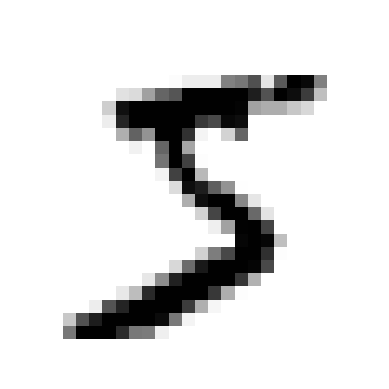

'5'

In [57]:
import matplotlib.pyplot as plt

def plot_digit(img):
  image = img.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

mnist_digit = X[0]
plot_digit(mnist_digit)
plt.show()

y[0]

In [56]:
# USe PIL Library

import numpy as np
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

img = mnist.data[:1].flatten()
label = mnist.target[:1]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

['5']
(784,)
(28, 28)


Inference Network; MNIST Dataset

Input Neuron : 784(28*28)
Output Neuron : 10(0-9)

Hidden Layer : 2
- 1st Layer : 50 neuron
- 2nd Layer : 100 neuron

In [58]:
# Load MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [ ]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
    # load_mnist(normalize=True, flatten=True, one_hot_label=False) # Load data
    # 별도의 데이터 로드 구현 필요

  return x_test, t_test


def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network


def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) +b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) +b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) +b3
  y = softmax(a3)

  return y

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 획득 : 예측 결과
  if p == t[i]:
    accuracy_cnt += 1

print ("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

# 다차원 배열의 대응하는 차원의 원소 수가 일치한다.
x.shape    # (10,000, 784)
x[0].shape # (   784,    )
W1.shape   # (   784,  50)
W2.shape   # (    50, 100)
W3.shape   # (   100,  10)

In [ ]:
# Batch Processing

x, t = get_data()
network = init_network()

batch_size = 128 # config batch size
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print ("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [60]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1) # 3*4에서 4
print(y) # row0에서 1번째, row1에서 2번째, ..., row3에서 0번째가 최대값.

[1 2 1 0]


In [61]:
y = np.array ([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

## Summary
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수 를 이용한다.
- 분류에서는 출력층의 뉴런수를 분류하려는 클래스수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.